In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np 
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [3]:
titanice_data = pd.read_csv('train.csv')

In [4]:
titanice_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanice_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanice_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
y = titanice_data.Survived

In [7]:
X = pd.get_dummies(X,dtype=int)

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
clf = DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [16]:
X_train.shape

(596, 10)

In [17]:
X_test.shape

(295, 10)

In [18]:
clf.score(X,y)

0.9797979797979798

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.score(X_train,y_train)

0.9798657718120806

In [21]:
clf.score(X_test,y_test)

0.7593220338983051

In [22]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
clf.score(X_train,y_train)

0.8406040268456376

In [25]:
clf.score(X_test,y_test)

0.8101694915254237

In [26]:
max_depth_values = range(1,100) 

In [27]:
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [29]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.810169,0.798711


In [30]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score','cross_val_score'],
                          var_name='set_type', value_name='score')

In [31]:
scores_data_long.query("set_type == 'cross_val_score'" ).head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.798711
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.798669


In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


C:\Users\ivanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ivanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ivanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ivanr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

<Axes: xlabel='max_depth', ylabel='score'>

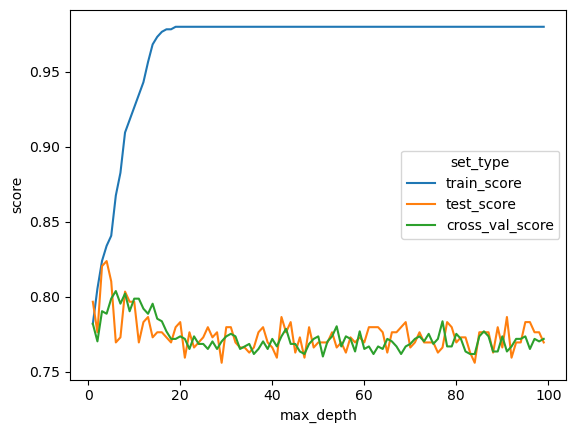

In [33]:
sns.lineplot(x='max_depth', y='score',hue='set_type',data=scores_data_long)

In [34]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7932203389830509

In [36]:
clf = DecisionTreeClassifier()

In [37]:
parametrs={'criterion': ['gini','entropy'], 'max_depth': range(1,30)}

In [38]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv=5)

In [39]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [40]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [41]:
best_clf=grid_search_cv_clf.best_estimator_

In [42]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [43]:
best_clf.score(X_test,y_test)

0.8033898305084746

In [44]:
y_pred=best_clf.predict(X_test)

In [45]:
precision_score(y_test,y_pred)

0.8297872340425532

In [46]:
recall_score(y_test,y_pred)

0.65

In [47]:
accuracy_score(y_test,y_pred)

0.8033898305084746

In [48]:
y_predicted_prob=best_clf.predict_proba(X_test)

<Axes: >

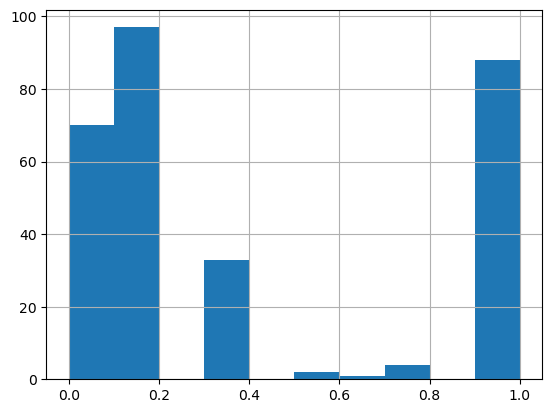

In [49]:
pd.Series(y_predicted_prob[:,1]).hist()

In [50]:
y_pred=np.where(y_predicted_prob[:,1] > 0.8,1,0)

In [51]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.1147541 , 0.38461538, 1.        , 0.        , 0.75      ,
       0.09803922, 0.30434783, 0.32      , 0.16666667, 0.6       ,
       0.66666667, 0.5       ])

In [52]:
precision_score(y_test,y_pred)

0.8409090909090909

In [53]:
recall_score(y_test,y_pred)

0.6166666666666667

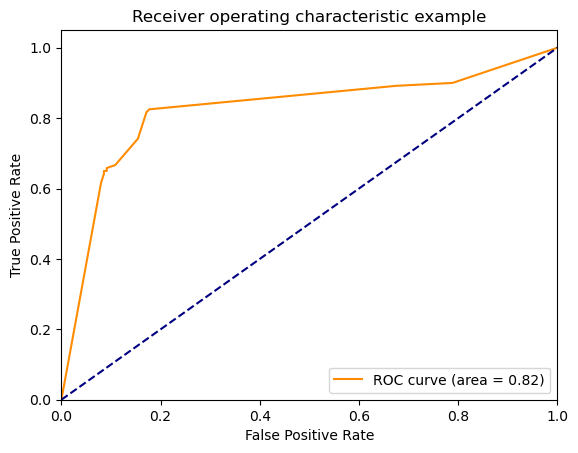

In [54]:

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [55]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split  = 5)

In [56]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

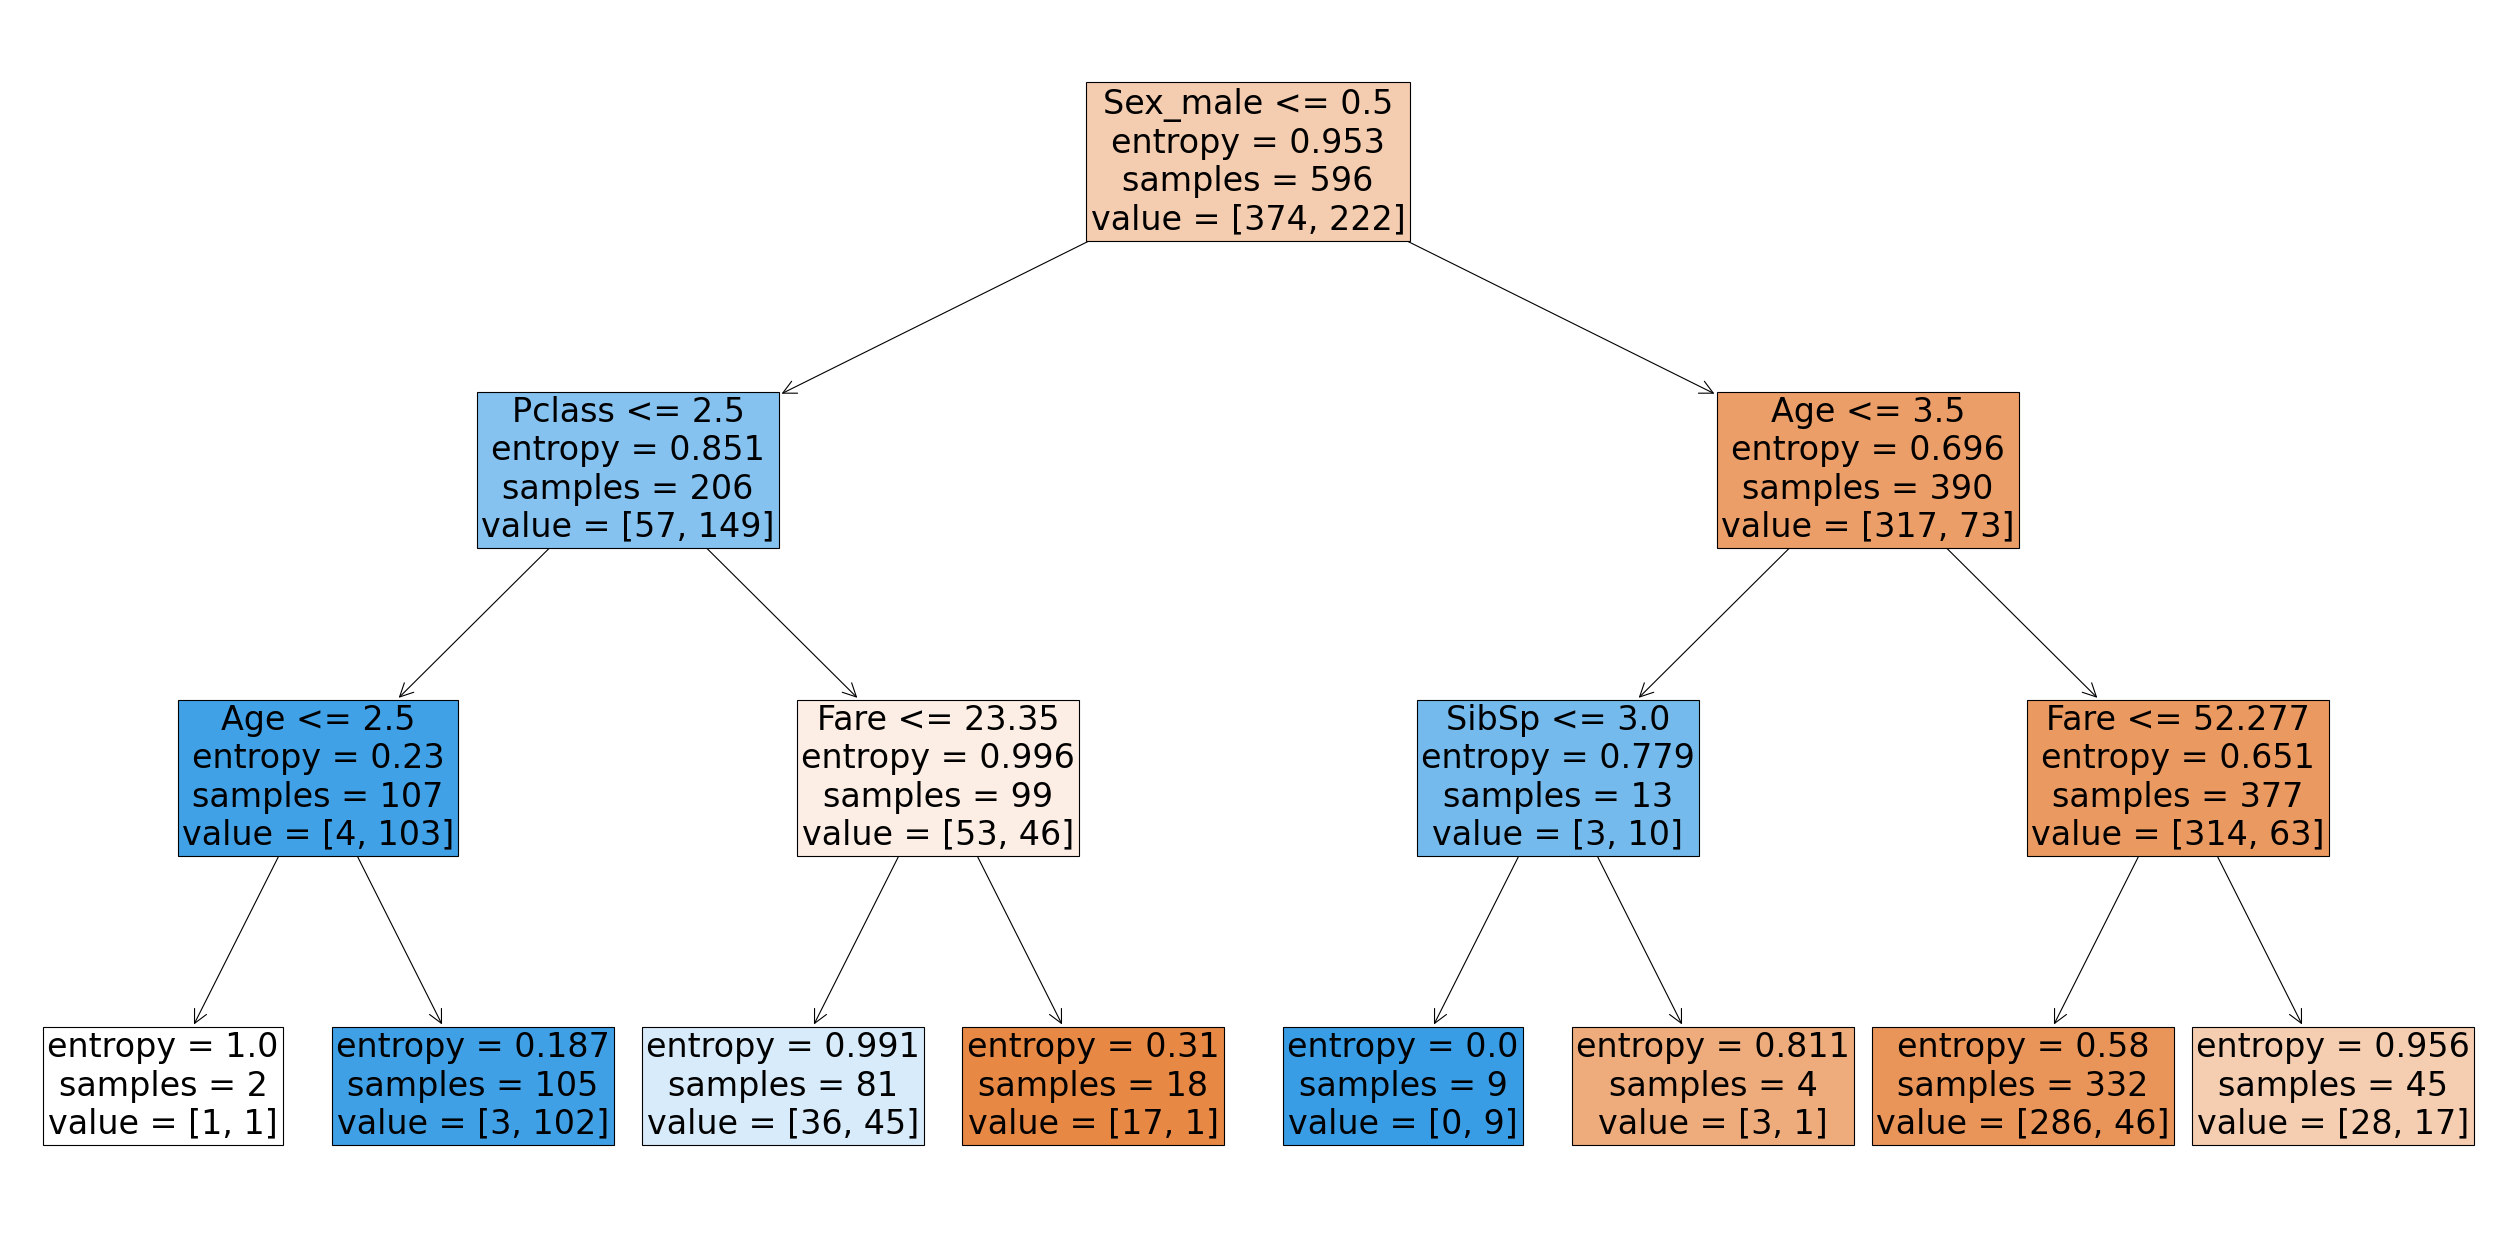

In [59]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf_rf = RandomForestClassifier(n_estimators=30,max_depth=5)

In [62]:
parametrs = {'n_estimators' : [10,20,30], 'max_depth' : [2,5,7,10]}

In [63]:
grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv=5)

In [64]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=30),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [65]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [66]:
grid_search_cv_clf.best_score_

0.8138375350140056

In [74]:
best_clf = grid_search_cv_clf.best_estimator_

In [75]:
best_clf.score(X_test,y_test)

0.8067796610169492

In [77]:
feature_importances=best_clf.feature_importances_

In [81]:
feature_importances_df = pd.DataFrame({'features': list(X_test),
                                     'feature_importances' : feature_importances})

In [84]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
4,Fare,0.238570
1,Age,0.201410
5,Sex_female,0.164836
6,Sex_male,0.154568
0,Pclass,0.097868
2,SibSp,0.057769
3,Parch,0.038244
7,Embarked_C,0.019771
9,Embarked_S,0.016471
8,Embarked_Q,0.010493
